# HYPERTENSION PREDICTION

# Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    ConfusionMatrixDisplay
)

# Load Data 

In [2]:
df = pd.read_csv("/kaggle/input/hypertension-risk-prediction-dataset/hypertension_dataset.csv")
df.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,Normal,6.4,25.8,NaN,Yes,Low,Non-Smoker,Yes
1,32,11.7,10,Normal,5.4,23.4,NaN,No,Low,Non-Smoker,No
2,78,9.5,3,Normal,7.1,18.7,NaN,No,Moderate,Non-Smoker,No
3,38,10.0,10,Hypertension,4.2,22.1,ACE Inhibitor,No,Low,Non-Smoker,Yes
4,41,9.8,1,Prehypertension,5.8,16.2,Other,No,Moderate,Non-Smoker,No


# Data Analysis 

In [3]:
df.size

21835

In [4]:
df.isnull().sum()

Age                   0
Salt_Intake           0
Stress_Score          0
BP_History            0
Sleep_Duration        0
BMI                   0
Medication          799
Family_History        0
Exercise_Level        0
Smoking_Status        0
Has_Hypertension      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1985 non-null   int64  
 1   Salt_Intake       1985 non-null   float64
 2   Stress_Score      1985 non-null   int64  
 3   BP_History        1985 non-null   object 
 4   Sleep_Duration    1985 non-null   float64
 5   BMI               1985 non-null   float64
 6   Medication        1186 non-null   object 
 7   Family_History    1985 non-null   object 
 8   Exercise_Level    1985 non-null   object 
 9   Smoking_Status    1985 non-null   object 
 10  Has_Hypertension  1985 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 170.7+ KB


In [6]:
df.describe()

,Age,Salt_Intake,Stress_Score,Sleep_Duration,BMI
count,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000
mean,50.341058,8.531688,4.979345,6.452242,26.015315
std,19.442042,1.994907,3.142303,1.542207,4.512857
min,18.000000,2.500000,0.000000,1.500000,11.900000
25%,34.000000,7.200000,2.000000,5.400000,23.000000
50%,50.000000,8.500000,5.000000,6.500000,25.900000
75%,67.000000,9.900000,8.000000,7.500000,29.100000
max,84.000000,16.400000,10.000000,11.400000,41.900000


# Data Preprocessing and Splitting 

In [7]:
df.Medication.value_counts()

Medication
Beta Blocker     412
ACE Inhibitor    323
Diuretic         245
Other            206
Name: count, dtype: int64

In [8]:
df.Medication.isnull().sum()

799

In [9]:
df = df.dropna(subset=["Medication"]).reset_index(drop=True)

In [10]:
df.Medication.isnull().sum()

0

In [11]:
label_cols = ['BP_History', 'Medication', 'Family_History', 'Exercise_Level', 'Smoking_Status', 'Has_Hypertension']

le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col].astype(str))  # Convert to string in case of NaNs or mixed types

In [12]:
df.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,38,10.0,10,0,4.2,22.1,0,0,1,0,1
1,41,9.8,1,2,5.8,16.2,3,0,2,0,0
2,20,10.8,3,0,5.2,21.9,1,1,0,0,1
3,39,8.9,0,1,7.8,27.6,1,1,0,0,0
4,19,9.3,7,1,4.7,36.5,1,1,1,1,1


In [13]:
X = df.drop("BP_History",axis=1)
y = df["BP_History"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Implementation 

In [15]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)

# Evaluation 

**METRICS**

In [16]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"🔹 Accuracy:  {accuracy:.4f}")
print(f"🔹 Precision: {precision:.4f}")
print(f"🔹 Recall:    {recall:.4f}")
print(f"🔹 F1 Score:  {f1:.4f}")

🔹 Accuracy:  0.5168
🔹 Precision: 0.5029
🔹 Recall:    0.5168
🔹 F1 Score:  0.5023


**CLASSIFICATION REPORT**

In [17]:
print("\n📄 Classification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0))


📄 Classification Report:

              precision    recall  f1-score   support

           0       0.63      0.78      0.70        73
           1       0.45      0.49      0.47        87
           2       0.44      0.29      0.35        78

    accuracy                           0.52       238
   macro avg       0.51      0.52      0.51       238
weighted avg       0.50      0.52      0.50       238



**CONFUSION MATRIX**

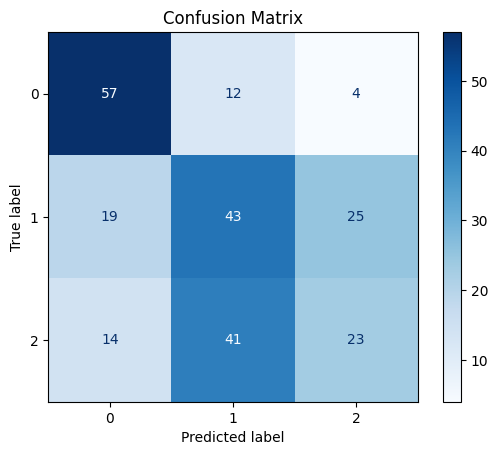

In [18]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

**ROC CURVE**

In [19]:
if len(set(y_test)) == 2:
    y_probs = gb_model.predict_proba(X_test)[:, 1]  # probability for class 1
    auc = roc_auc_score(y_test, y_probs)
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    
    print(f"\n🔹 ROC AUC Score: {auc:.4f}")

    # Plot ROC Curve
    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()